# Pymaceuticals Inc.
---

### Analysis

Summary Statistics Tables: Based on the tumor volume of mice treated by Capomulin over a period of 45 days, we can see that overall the Capomulin treatment was able to shrink the tumors more than most of the other treatments except for Ramicane. Capomulin had a lower mean (40.68) and median (41.56) than all of the other drugs. It also had a lower variance (24.95), standard deviation (5) and SEM (0.33) compared to the others which is ideal. 

Bar and Pie Charts: The bar chart shows the data pulled for the summary statistics. We can see that Capomulin and Ramicane did better than the rest of the treatments which performed similarly. The worst performing treatment was propriva. The pie chart shows that there were more male mice than female mice.

Quartiles, Outliers, Box Plot: The box and whisker's plot shows the top four performing treatments, their performance data and outliers. From this, we can see that most tumors treated by Infubol had a volume around 59 except the outlier which had a volume around 38.

Line Plot: Using mouse l509 as a sample of the mice treated by Capomulin, the line graphs shows a fluxuation in tumor volume but we can see that overall the tumor volume shrank more as the time passed. The scatter plot shows a positive correlation between mouse weight and tumor volume, meaning that generally speaking, mice who weighed more had larger tumor volumes. Please note that there are many outliers. 

Correlation and Regression: When calculated, the correlation between mouse weight and average tumor volume is positive and it is 0.84. Using Pearson's correlation, the correlation is strong as it's greater than 0.7.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "C:/Users/leean/OneDrive/Data_Analytics/Projects/pymaceuticals-analysis/data/Mouse_metadata.csv"
study_results_path = "C:/Users/leean/OneDrive/Data_Analytics/Projects/pymaceuticals-analysis/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df=study_results.merge(mouse_metadata,on="Mouse ID")

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
df['Mouse ID'].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df[df.duplicated(['Mouse ID','Timepoint'])]['Mouse ID'].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
df[df['Mouse ID']=='g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean=df[df['Mouse ID']!='g989']
clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
clean['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Thank you to my tutor Geronimo Perez who helped make this portion of the assignment easier. 
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
clean[:2]
grp=clean.groupby('Drug Regimen')['Tumor Volume (mm3)']
pd.DataFrame({
    'Mean Tumor Volume':grp.mean(),
    'Median Tumor Volume':grp.median(),
    'Variance':grp.var(),
    'Standard Deviation':grp.std(),
    'SEM':grp.sem(),
})


,Mean Tumor Volume,Median Tumor Volume,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
clean.groupby('Drug Regimen').aggregate({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

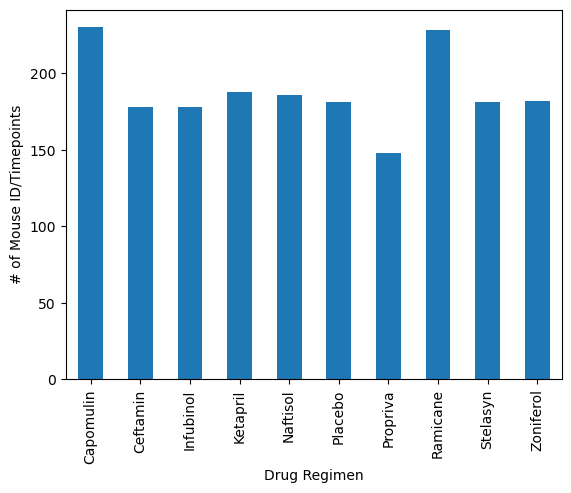

In [19]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drugbar=pd.Series(clean.groupby(['Drug Regimen'])['Mouse ID'].count())
drugbar.plot(kind='bar')
plt.ylabel('# of Mouse ID/Timepoints')
plt.show()


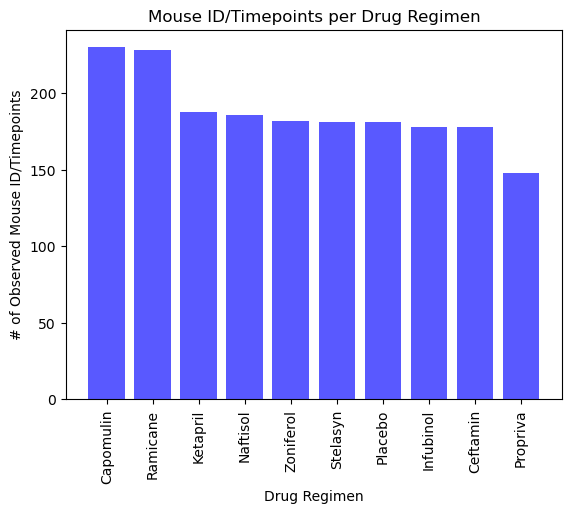

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Per the reference starter code, I don't think I needed to add extra features but
#I wanted to practice using them
drugs=clean['Drug Regimen'].value_counts()
plt.bar(drugs.index.values, drugs, color="blue", alpha=.65, align="center")
plt.title("Mouse ID/Timepoints per Drug Regimen")
plt.ylabel("# of Observed Mouse ID/Timepoints")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.show()

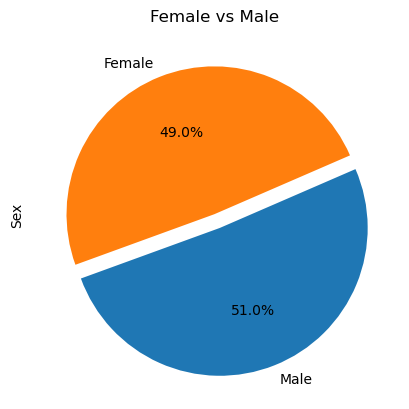

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sexpie=clean['Sex'].value_counts()
explode = (0.1,0)
mouse_sexpie.plot(kind='pie', autopct='%1.1f%%', explode=explode, startangle=200)
plt.title('Female vs Male')
plt.show()

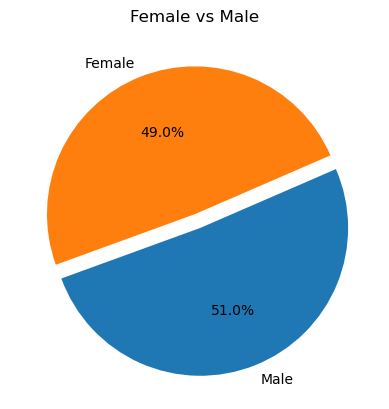

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mousesexpie=clean['Sex'].value_counts()
explode = (0.1,0)
plt.pie(mousesexpie, labels=mousesexpie.index.values, explode=explode, autopct="%1.1f%%", startangle=200)
plt.title("Female vs Male")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
df.sort_values(by=['Mouse ID', 'Timepoint'], ascending=True)
max_timepoint = clean.groupby('Mouse ID')['Timepoint'].max()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumorvol= pd.merge(max_timepoint, df, on=['Mouse ID', 'Timepoint'])
final_tumorvol

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    tumor_volume= final_tumorvol[final_tumorvol['Drug Regimen']== treatment]['Tumor Volume (mm3)']
    tumor_volumes.append(tumor_volume)
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds
    iqr=tumor_volume.quantile(.75)-tumor_volume.quantile(.25)
    low=tumor_volume.quantile(.25)-iqr*1.5
    upper=tumor_volume.quantile(.75)+iqr*1.5

    print(f"{treatment}'s potential outliers: {tumor_volume[(tumor_volume<low) | (tumor_volume>upper)]}")



Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


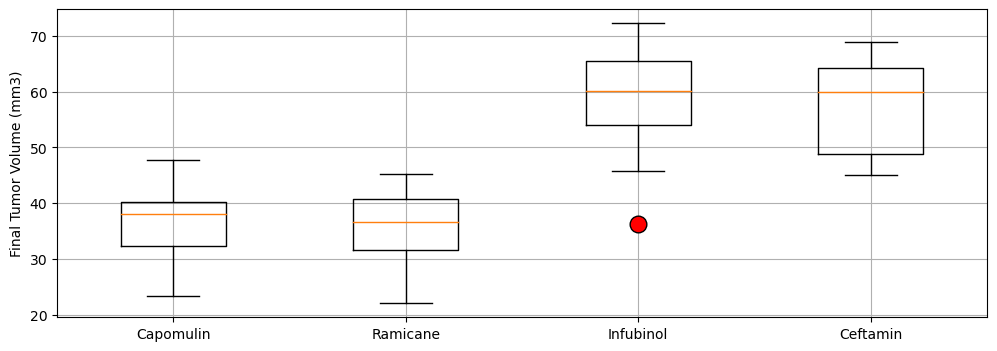

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Thank you again to my tutor who taught me "fliersprops" which set parameters to make the dot larger and red.
plt.figure(figsize=[12,4])
plt.boxplot(tumor_volumes, labels=treatments, flierprops={'markersize':12, 'markerfacecolor':'red'})
plt.grid()
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

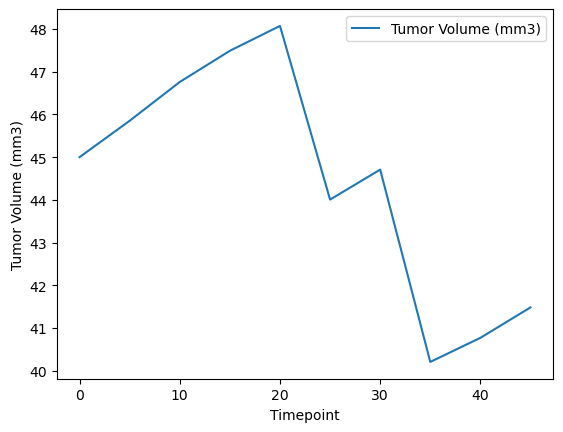

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#I did this with pandas
clean[clean['Mouse ID'] == 'l509'][['Tumor Volume (mm3)','Timepoint']].set_index('Timepoint').plot()
plt.ylabel('Tumor Volume (mm3)')
plt.show()

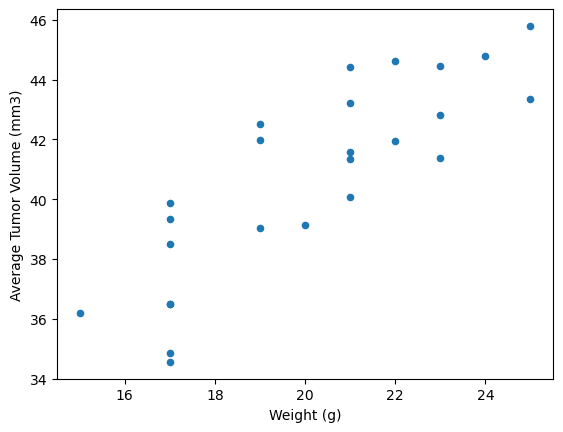

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
clean[clean['Drug Regimen']=='Capomulin'].groupby('Mouse ID')[['Tumor Volume (mm3)','Weight (g)']].mean().plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

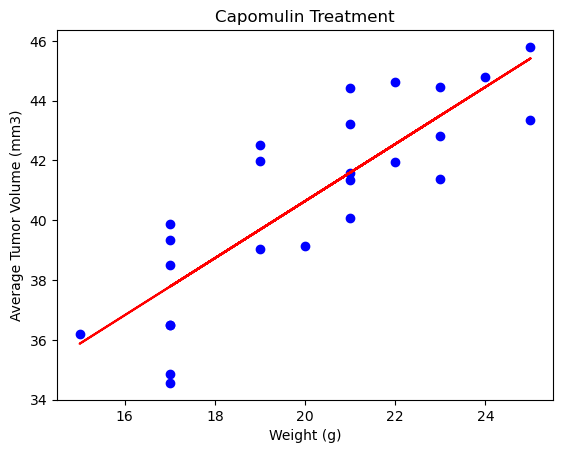

The correlation between mouse weight and the average tumor volume is: 0.84


In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

capomulin_treatment = clean[clean['Drug Regimen']== 'Capomulin']
capo_avg= capomulin_treatment.groupby('Mouse ID', as_index=False).mean(numeric_only=True)
capo_avg_weight_tumvol=capo_avg[['Tumor Volume (mm3)', 'Weight (g)']]

corco = capo_avg_weight_tumvol.corr().iloc[0, 1]

(slope, intercept, r_value, p_value, std_err) = linregress(capo_avg_weight_tumvol['Weight (g)'], capo_avg_weight_tumvol['Tumor Volume (mm3)'])

plt.scatter(capo_avg_weight_tumvol['Weight (g)'], capo_avg_weight_tumvol['Tumor Volume (mm3)'], color='blue')

regression_value = slope * capo_avg_weight_tumvol['Weight (g)'] + intercept
plt.plot(capo_avg_weight_tumvol['Weight (g)'], regression_value, color='red', label='Linear Regression')

plt.title('Capomulin Treatment')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

print(f'The correlation between mouse weight and the average tumor volume is: {corco:.2f}')

